In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre
from tqdm import tqdm

import mu2

import constants as const
from interaction import potential
from counterterm import local_LO_counterterm
from mottmassey import mm_potential

gr = 4/3
h = 3

plt.style.use('science')

In [2]:
lo_rg_flow = np.loadtxt('rgflow_local_lo_a0_fix.txt')
nlo_rg_flow = np.loadtxt('rgflow_local_nlo_a0_B6_fix.txt')

ell = 0

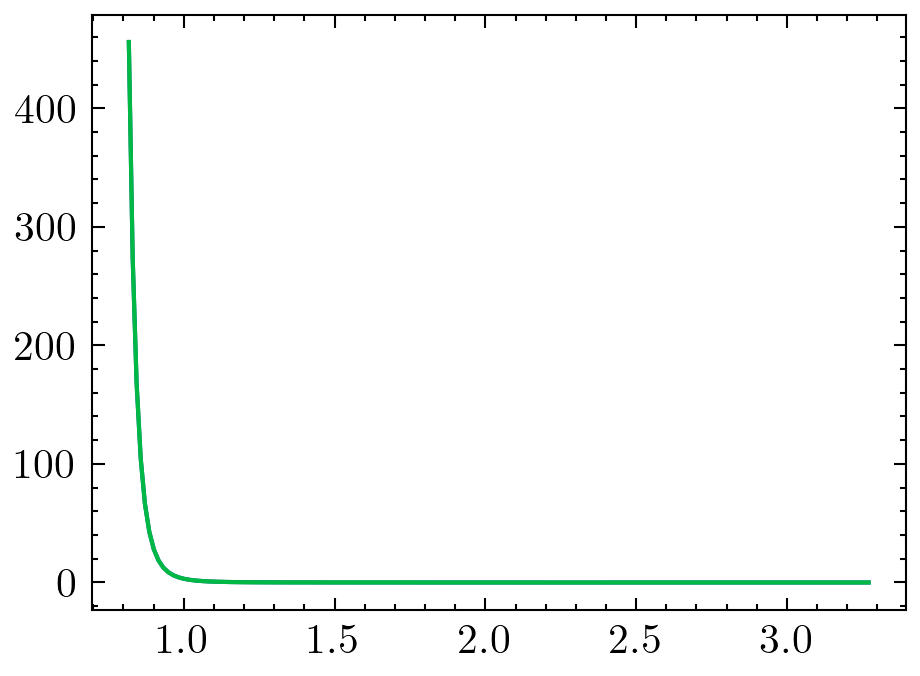

In [4]:
fig, ax = plt.subplots(dpi=300)
fig.patch.set_facecolor('white')

ax.plot(lo_rg_flow[:, 0], lo_rg_flow[:, 1])
ax.plot(nlo_rg_flow[:, 0], nlo_rg_flow[:, 1]);

In [7]:
rmesh = mu2.Mesh(0, 10*const.BETA4, 2000)
systems = []
for (Ri, _) in tqdm(lo_rg_flow):
    qmesh = mu2.Mesh(0, 20*2/Ri, 300, log=False)
    x = mu2.LocalCounterterm(local_LO_counterterm, lambda r, R: 0, rmesh, qmesh, Ri, ell)
    
    systems.append(mu2.System(mu2.Interaction(potential, x, rmesh, scheme='local'), const.MU, ell))

100%|███████████████████████████████████████████| 50/50 [03:47<00:00,  4.56s/it]


In [19]:
deltas_lo = np.loadtxt('phase_shifts_lo.txt')

In [20]:
index = 0
k = deltas_lo[-1, 0]

s = systems[index]
glo = lo_rg_flow[index, 1]

n = 10
gnlos = np.linspace(-1, 1, 10)
deltas = np.zeros(n)

for i in tqdm(range(n)):
    gj = gnlos[i]
    xterm = s.interaction.counterterm.gen(1, 0)
    kcd = mu2.cc.cscatter.kcotdelta_py(k, s.v_tilde + glo*xterm + gj*k**2/(2*const.MU)*xterm, 
                                       s.q, s.wq, 20*2/s.r_c, ell, 2*const.MU)
    deltas[i] = np.arctan(k/kcd)

100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 49.63it/s]


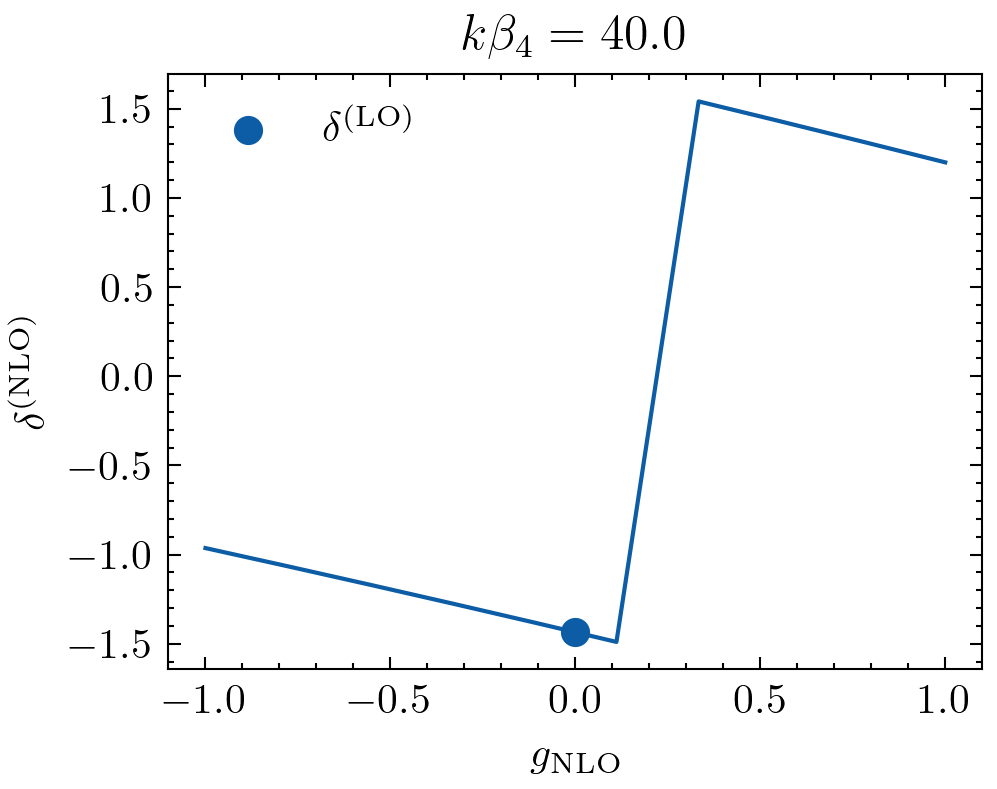

In [26]:
fig, ax = plt.subplots(dpi=300)
fig.patch.set_facecolor('white')

ax.plot(gnlos, deltas)
ax.scatter(0, deltas_lo[-1, 1], label=r'$\delta^{({\rm LO})}$')

ax.set_title(rf'$k\beta_4={k*const.BETA4}$')
ax.legend()
ax.set_xlabel(r'$g_{\rm NLO}$')
ax.set_ylabel(r'$\delta^{({\rm NLO})}$');